In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv("archive/Korea Income and Welfare.csv")
df  # 92857 rows × 14 columns


,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


In [123]:
job_code=pd.read_excel("archive/job_code_translated.xlsx")
job_code

,대분류,Unnamed: 1,Unnamed: 2,job_code,job_title
0,1 관리자,11,Senior public and corporate positions,111,"Assembly members, senior public officials and ..."
1,NaN,NaN,NaN,112,senior corporate executive
2,NaN,12,Administrative and management support manageri...,120,Administrative and management support manager
3,NaN,13,Professional service manager,131,"Research, education and legal manager"
4,NaN,NaN,NaN,132,Insurance and Finance Manager
...,...,...,...,...,...
144,NaN,99,"Agriculture, forestry and fishing and other se...",991,"Simple workers related to agriculture, forestr..."
145,NaN,NaN,NaN,992,"Employees related to meter reading, collection..."
146,NaN,NaN,NaN,999,Other service related simple employees
147,A 군인,A1,soldier,1011,Military officer


In [124]:
df['occupation']=df['occupation'].replace({" ":0}).astype(int)

In [125]:
korea=pd.merge(df, job_code, left_on='occupation', right_on='job_code', how='left')
korea # 92857 rows × 19 columns

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,대분류,Unnamed: 1,Unnamed: 2,job_code,job_title
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,0,,8,NaN,NaN,NaN,NaN,NaN
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,0,,10,NaN,NaN,NaN,NaN,NaN
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,0,,10,NaN,NaN,NaN,NaN,NaN
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,0,,1,NaN,NaN,NaN,NaN,NaN
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,0,,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,,NaN,NaN,NaN,874.0,Goods movement equipment operator
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,,NaN,NaN,NaN,874.0,Goods movement equipment operator
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,,NaN,NaN,NaN,874.0,Goods movement equipment operator
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,,NaN,NaN,NaN,874.0,Goods movement equipment operator


In [126]:
# 분석 주제
# 직업간 수입의 관계를 통해 직업들의 수입을 알아보았습니다.
# 또한 한국 수입의 전체적인 비중을 차지하는 직업을 알아보고, 어떤 직업이 고소득 직업인지 알아보았습니다.

In [127]:
# 결측값 확인해보기
for col in korea.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (korea[col].isnull().sum() / korea[col].shape[0]))
    print(msg)
# column:   대분류   Percent of NaN value: 83.83%
# column: Unnamed: 1 Percent of NaN value: 68.57%
# column: Unnamed: 2 Percent of NaN value: 68.57%
# column:   job_code Percent of NaN value: 42.76%
# column:  job_title Percent of NaN value: 42.76%

column:         id	 Percent of NaN value: 0.00%
column:       year	 Percent of NaN value: 0.00%
column:       wave	 Percent of NaN value: 0.00%
column:     region	 Percent of NaN value: 0.00%
column:     income	 Percent of NaN value: 0.00%
column: family_member	 Percent of NaN value: 0.00%
column:     gender	 Percent of NaN value: 0.00%
column:  year_born	 Percent of NaN value: 0.00%
column: education_level	 Percent of NaN value: 0.00%
column:   marriage	 Percent of NaN value: 0.00%
column:   religion	 Percent of NaN value: 0.00%
column: occupation	 Percent of NaN value: 0.00%
column: company_size	 Percent of NaN value: 0.00%
column: reason_none_worker	 Percent of NaN value: 0.00%
column:        대분류	 Percent of NaN value: 83.83%
column: Unnamed: 1	 Percent of NaN value: 68.57%
column: Unnamed: 2	 Percent of NaN value: 68.57%
column:   job_code	 Percent of NaN value: 42.76%
column:  job_title	 Percent of NaN value: 42.76%


<AxesSubplot:>

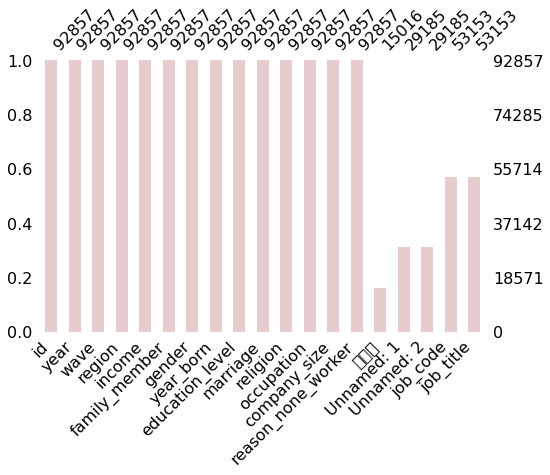

In [128]:
# 결측값 시각화
msno.bar(df=korea.iloc[:, :], figsize=(8, 5), color=(0.9, 0.8, 0.8))

id                        0
year                      0
wave                      0
region                    0
income                    0
family_member             0
gender                    0
year_born                 0
education_level           0
marriage                  0
religion                  0
occupation                0
company_size              0
reason_none_worker        0
대분류                   77841
Unnamed: 1            63672
Unnamed: 2            63672
job_code              39704
job_title             39704
dtype: int64


<AxesSubplot:>

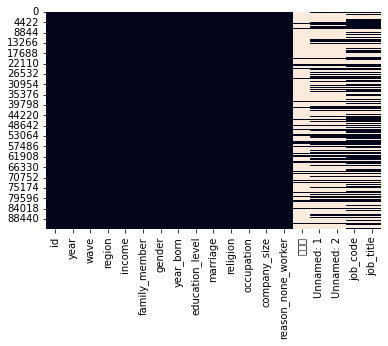

In [129]:
# 결측값 시각화2
print(korea.isnull().sum())
sns.heatmap(korea.isnull(), cbar=False)

In [130]:
# 분석에 필요없는 대분류, Unnamed: 1, Unnamed: 2, job_code 컬럼 삭제
korea = korea.drop(['Unnamed: 1','Unnamed: 2'], axis=1)
korea # 92857 rows × 15 columns

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,대분류,job_code,job_title
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,0,,8,NaN,NaN,NaN
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,0,,10,NaN,NaN,NaN
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,0,,10,NaN,NaN,NaN
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,0,,1,NaN,NaN,NaN
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,0,,10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,,NaN,874.0,Goods movement equipment operator
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,,NaN,874.0,Goods movement equipment operator
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,,NaN,874.0,Goods movement equipment operator
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,,NaN,874.0,Goods movement equipment operator


In [131]:
# 먼저 각각의 직업만 놓고 봤을 때 수입이 높은 직업은 무엇이며, 전체적인 생산활동으로 봤을 때 비중이 높은 직업은 무엇인지 알아보도록 하겠습니다.

In [132]:
# 연도와 직업이름을 그룹화하고 정렬하고 합계를 구한다
top_k_income = korea.groupby(['year','job_title'], sort=True, as_index = False).sum()
# 다시 연도와 수입 기준 오름차순 정렬한다(제일 높은 수입의 직업이 나오도록)
top_k_income = top_k_income.sort_values(by = ['year', 'income'], ascending=[True,False])
top_k_income

,year,job_title,id,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,job_code
3,2005,Administrative clerk,8131917169,269,776,1204343.2,865,302,529140,1704,439,421,83659,83659.0
15,2005,Crop cultivation worker,32762069691,591,2712,713122.5,1420,698,1146808,1951,738,926,361101,361101.0
51,2005,Painting and plating machine operator,7875583331,231,733,697493.8,803,232,452328,1127,295,363,194502,194502.0
13,2005,Cleaners and environmental cleaners,7161653836,236,789,474672.0,703,241,461751,1002,417,378,222076,222076.0
1,2005,Accounting and accounting clerk,3702319595,95,387,447313.4,333,97,186463,609,123,159,29735,29735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2018,"Travel, information and reception clerk",103831403,42,15,8018.0,6,5,5918,17,9,4,1176,1176.0
1683,2018,Cargo train conductor and related employees,96480701,14,5,6153.0,2,1,1944,5,1,2,872,872.0
1680,2018,Beverage manufacturing related machine operator,47440101,14,6,6023.0,2,2,1987,6,5,2,812,812.0
1743,2018,Nutritionist,31980101,14,3,4117.0,2,2,1986,6,5,2,244,244.0


<AxesSubplot:>

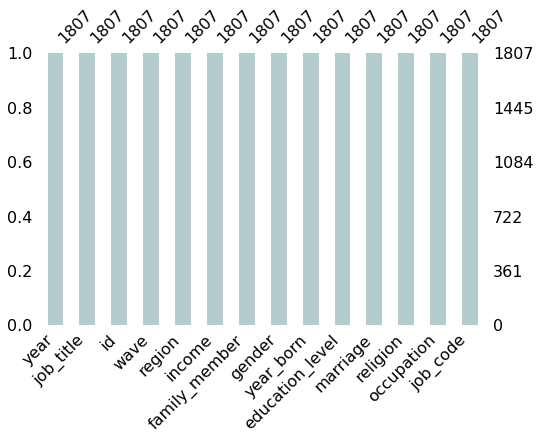

In [133]:
# missingno test
msno.bar(df=top_k_income.iloc[:, :], figsize=(8, 5), color=(0.7, 0.8, 0.8))

<AxesSubplot:xlabel='income', ylabel='job_title'>

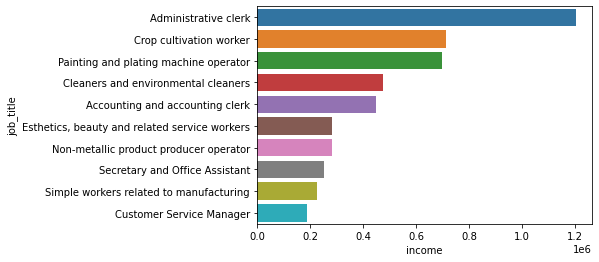

In [134]:
# 2005년 한국의 소득에 가장 많은 비중을 가진 직업 10위
top_k_income_2005 = top_k_income[top_k_income['year'] == 2005]
top_k_income_2005 = top_k_income_2005[['job_title', 'income']].head(10)
sns.barplot(x="income", y="job_title", data=top_k_income_2005)
# administrativr clerk : 사무원
# painting and plating machine operator : 도장 및 도금 기계 조작자
# 2005년을 기준으로 분석을 진행했습니다. 한국은 사무직 종사자가 가장 많고 
# 그 다음으로 농업쪽에서 종사하는 노동자가 많다는 것을 알 수 있습니다.
# 그 밖에 도장 및 도금 기계를 하는 인구도 많은 것으로 보입니다.

<AxesSubplot:xlabel='income', ylabel='job_title'>

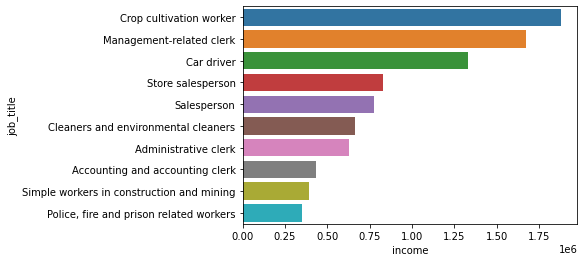

In [135]:
# 2018년 한국의 소득에 가장 많은 비중을 가진 직업 10위
top_k_income_2018 = top_k_income[top_k_income['year'] == 2018]
top_k_income_2018 = top_k_income_2018[['job_title', 'income']].head(10)
sns.barplot(x="income", y="job_title", data=top_k_income_2018)
# crop cultivation worker : 농작물 재배 노동자
# management-related clerk : 경영 관리 사무원
# 2018년은 농업 종사자가 가장 많고 운송업을 하는 인구도 많은 것으로 보이며, 
# 운영과 영업을 하는 사람들의 비율 또한 높은 것을 확인할 수 있습니다.

In [136]:
# 직업간의 소득 통계
income=korea.groupby('job_title').income.agg(['mean','min','max','sum']).sort_values(by = 'mean', ascending=False)
income

,mean,min,max,sum
job_title,,,,
senior corporate executive,13864.736842,2568.0,61269.0,5.268600e+05
"Managers related to culture, art, design and video",12062.545455,1800.0,75683.0,2.653760e+05
Medical professional,11397.791071,280.0,75165.6,1.276553e+06
Insurance and Finance Manager,9798.697183,1212.0,23157.0,1.391415e+06
Other sales and customer service managers,8975.945455,-47.0,170204.0,1.481031e+06
...,...,...,...,...
Simple food workers,2340.641786,-120.0,22848.0,1.310759e+06
Crop cultivation worker,2330.070842,-17205.0,30420.0,2.348478e+07
Cleaners and environmental cleaners,2321.635462,-294.0,14212.0,6.500579e+06


<AxesSubplot:xlabel='income', ylabel='job_title'>

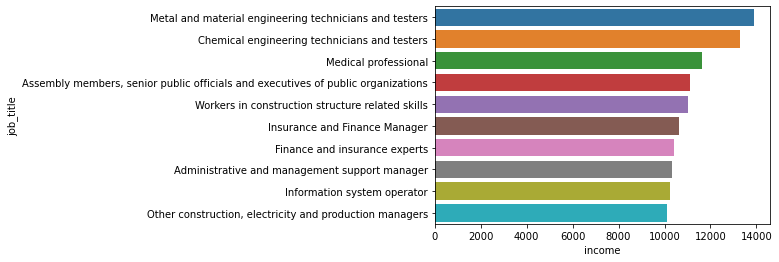

In [137]:
# 연도별 직업의 평균 소득
top_k_income_job = korea.groupby(['year','job_title'], sort=True, as_index = False).mean()
top_k_income_job = top_k_income_job.sort_values(by = ['year', 'income'], ascending=[True,False])
# 2005년 
top_k_income_job_2005 = top_k_income_job[top_k_income_job['year'] == 2005]
top_k_income_job_2005 = top_k_income_job_2015[['job_title', 'income']].head(10)
sns.barplot(x="income", y="job_title", data=top_k_income_job_2005)

<AxesSubplot:xlabel='income', ylabel='job_title'>

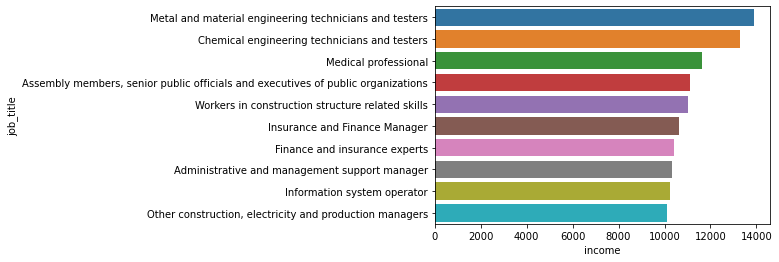

In [138]:
# 2018년 
top_k_income_job_2018 = top_k_income_job[top_k_income_job['year'] == 2018]
top_k_income_job_2018 = top_k_income_job_2015[['job_title', 'income']].head(10)
sns.barplot(x="income", y="job_title", data=top_k_income_job_2018)
# 2005년과 2018년의 연도별 직업의 소득이 평균적으로 높은 상위권 10위의 직업들은 같습니다.

In [139]:
# 전체 평균보다 낮은 수입을 받은 직업들 목록
total_mean = korea[korea['occupation']!= 'NaN'].income.mean() #  결측값은 제외
print("평균 수익: "+str(total_mean))
print("="*90)
job_mean = korea.groupby('job_title')['income'].mean()
job_over_mean = job_mean[job_mean <= total_mean].sort_values(ascending=True)
print("평균 수익보다 낮은 직업들 : "+"\t"+str(job_over_mean))

평균 수익: 3441.122326868694
평균 수익보다 낮은 직업들 : 	job_title
Simple workers related to agriculture, forestry and fishing         1875.865156
Housework and parenting helper                                      2221.201031
Cleaners and environmental cleaners                                 2321.635462
Crop cultivation worker                                             2330.070842
Simple food workers                                                 2340.641786
Other service related simple employees                              2571.275068
Medical and welfare related service workers                         2755.938165
Other cosmetology/ceremony and medical assistant service workers    2852.202128
Curator, librarian and records manager                              3092.896552
Forestry related workers                                            3100.923077
Esthetics, beauty and related service workers                       3123.812876
Sales-related simple employee                                      

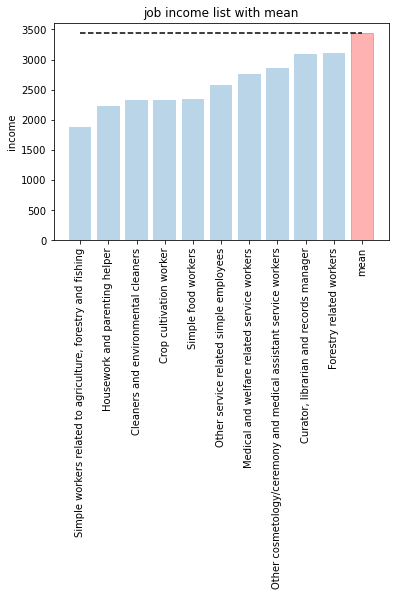

In [140]:
# 시각화
n = 10
job_list = job_over_mean.head(n).index.tolist()
job_list.append('mean')
x_pos = np.arange(n+1)
income_list = job_over_mean.head(n).tolist()
income_list.append(total_mean)

bar_list = plt.bar(x_pos, income_list, align='center', alpha=0.3)
bar_list[n].set_color('r')
plt.plot([0.,n], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, job_list, rotation='vertical')

plt.ylabel('income')
plt.title('job income list with mean')

plt.show()
# 위에서 확인했듯이 한국의 대부분의 수익을 올리는 직업은 농사자였습니다.
# 하지만 개별 수익만 가지고 보면 평균 대비 적은 수익을 받는다는 것을 알 수 있습니다.
# 그리고 청소부와 자동차 운전자 또한 많은 인구를 차지하는 직업들이었습니다.
# 하지만 그래프를 통해 청소부가 다른 모든 상위 직업 범주 중에서 월급을 가장 적게 받는다는 것을 알 수 있습니다.

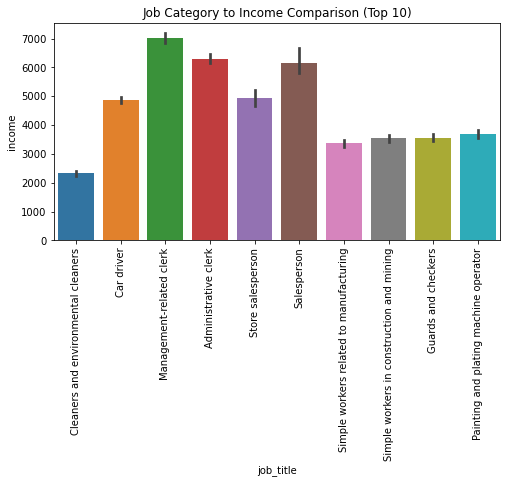

In [182]:
# 종사자가 많은 직업군 10개의 수익현황
plt.figure(figsize=(8,4))
sns.barplot(data=korea, x='job_title', y='income', order=korea.job_title.value_counts().iloc[1:11].index)
plt.title('Job Category to Income Comparison (Top 10)')
plt.xticks(rotation=90)
plt.show()

In [141]:
# 성별 소득을 확인헤 보았습니다.
# bar plot 그려주는 함수
def ratio_plot_by_group(data , value , group = None,  fig_kws={"stacked" : True, "title" : ""}) :
    if group is None :
        result = data[value].value_counts(normalize=True)
        multi_index = pd.MultiIndex.from_product([[value], result.index.unique().tolist()], 
                                         names=["group", value])
        result.index = multi_index
        result = result.unstack()
    else :
        result = data.groupby(group)[value].value_counts(normalize=True).unstack()
    return result.plot(kind="bar", 
                stacked= fig_kws.get("stacked" , True), 
                title=fig_kws.get("title",""))

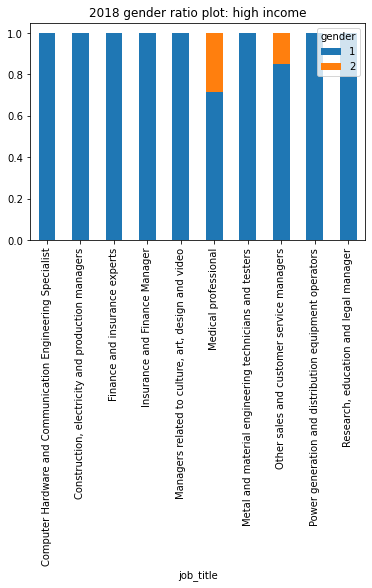

In [142]:
# 2018년 소득 상위 10위 그룹
top_k_income_job_2018 = top_k_income_job[top_k_income_job['year'] == 2018]
top_k_income_job_2018 = top_k_income_job_2018.head(10)
job_k_list = top_k_income_job_2018['job_title'].values

data = korea[korea['year']==2018]
data = data[data['job_title'].isin(job_k_list)]
ratio_plot_by_group(data ,"gender", group="job_title",fig_kws = {"stacked":True,"title" : "2018 gender ratio plot: high income"})
plt.show()
# 소득 상위 10위 그룹에서 남성의 비중이 매우 높습니다.

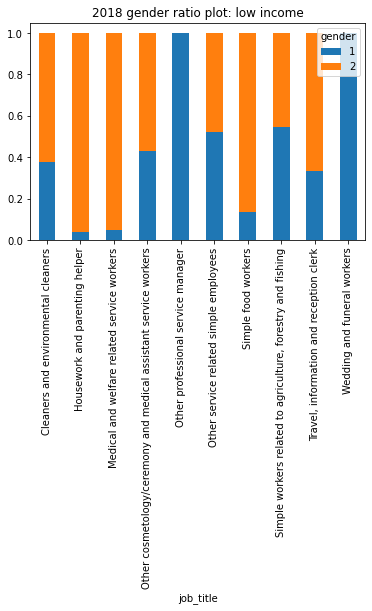

In [143]:
# 2018년 소득 하위 10위 그룹
low_k_income_job = korea.groupby(['year','job_title'], sort=True, as_index = False).mean()
low_k_income_job = low_k_income_job.sort_values(by = ['year', 'income'], ascending=[True,True])
low_k_income_job_2018 = low_k_income_job[low_k_income_job['year'] == 2018]
low_k_income_job_2018 = low_k_income_job_2018.head(10)
job_k_list = low_k_income_job_2018['job_title'].values

data = korea[korea['year']==2018]
data = data[data['job_title'].isin(job_k_list)]
ratio_plot_by_group(data ,"gender", group="job_title",fig_kws = {"stacked":True,"title" : "2018 gender ratio plot: low income"})
plt.show()
# 소득 하위 10위 그룹에서 여성의 비중이 높습니다.
# 특히 요리 및 가사노동 종사자의 여성의 비율이 훨씬 높습니다.

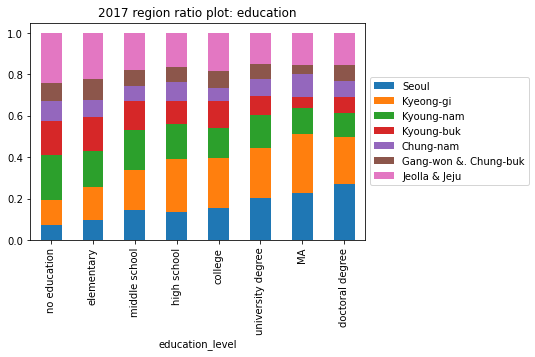

In [144]:
# 각 지역에서 살고 있는 사람들의 교육정도를 살펴보았습니다.
data = korea[korea['year']==2017]
ratio_plot_by_group(data ,"region", group="education_level",fig_kws = {"stacked":True,"title" : "2017 region ratio plot: education"})
x = np.array([0,1,2,3,4,5,6,7])
region = ['Seoul', 'Kyeong-gi', 'Kyoung-nam', 'Kyoung-buk', 'Chung-nam', 'Gang-won &. Chung-buk', 'Jeolla & Jeju']
education_level = ['no education', 'elementary', 'middle school', 'high school', 'college', 'university degree', 'MA', 'doctoral degree']
plt.xticks(x, education_level)
plt.legend(labels=region, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 대부분의 고학력자는 수도권에 몰려 있다는 것을 그래프로 확인할 수 있습니다.

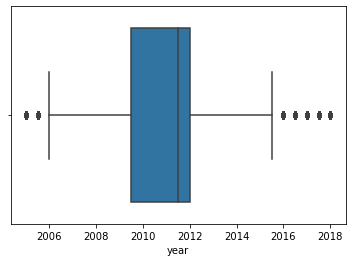

In [145]:
kor_df_id = korea.groupby(['id'], sort=True, as_index = False).mean()
ax = sns.boxplot(x=kor_df_id["year"])

In [146]:
# 연도별 데이터 분석을 위해 최근 5년간의 데이터를 가지고 왔습니다.
kor_df_id = kor_df_id[2014<=kor_df_id['year']]
kor_df_id = kor_df_id[kor_df_id['year']<=2018]
kor_df_id

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,job_code
20,200901,2015.5,11.5,1.000,5484.000000,1.666667,1.000000,1978.000000,5.000,1.000000,1.500,274.333333,274.333333
27,261101,2016.5,12.5,1.000,2870.750000,2.000000,1.000000,1984.000000,7.000,1.000000,1.750,393.250000,521.000000
81,771201,2016.0,12.0,5.000,2616.000000,1.000000,1.000000,1975.000000,5.000,5.000000,2.000,921.000000,921.000000
91,851401,2018.0,14.0,6.000,3960.000000,2.000000,1.000000,1979.000000,6.000,1.000000,2.000,742.000000,742.000000
93,861001,2016.0,12.0,2.000,3837.800000,3.200000,1.000000,1987.000000,7.000,1.000000,1.200,863.000000,863.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10041,97960701,2014.5,10.5,5.500,1765.875000,2.000000,1.000000,1933.000000,3.000,1.000000,2.000,534.625000,611.000000
10042,97970701,2014.5,10.5,6.000,689.125000,1.125000,1.875000,1933.250000,2.875,1.875000,1.000,0.000000,NaN
10043,97980701,2014.5,10.5,6.000,3083.000000,2.250000,1.000000,1956.000000,5.000,1.000000,1.125,797.125000,797.125000
10044,97990701,2014.0,10.0,6.000,1778.942857,1.857143,1.142857,1932.142857,2.000,1.142857,2.000,174.571429,611.000000


In [147]:
kor_df_id["year_born"].mean()  # 1960.172711513632
# 평균 연령이 너무 높아 연령대를 조절하였습니다.
kor_df_id = kor_df_id[1960<kor_df_id['year_born']]
kor_df_id = kor_df_id[kor_df_id['year_born']<1985]
kor_df_id

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,job_code
20,200901,2015.5,11.5,1.000,5484.000,1.666667,1.0,1978.0,5.00,1.0,1.500,274.333333,274.333333
27,261101,2016.5,12.5,1.000,2870.750,2.000000,1.0,1984.0,7.00,1.0,1.750,393.250000,521.000000
81,771201,2016.0,12.0,5.000,2616.000,1.000000,1.0,1975.0,5.00,5.0,2.000,921.000000,921.000000
91,851401,2018.0,14.0,6.000,3960.000,2.000000,1.0,1979.0,6.00,1.0,2.000,742.000000,742.000000
104,961401,2018.0,14.0,2.000,2640.000,1.000000,1.0,1983.0,6.00,5.0,2.000,899.000000,899.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,97670701,2014.5,10.5,1.875,4652.750,3.625000,1.0,1978.0,6.00,1.0,1.500,312.875000,312.875000
10012,97690701,2014.5,10.5,2.000,6862.625,4.000000,1.0,1966.0,5.00,1.0,2.000,924.375000,924.375000
10019,97760701,2014.5,10.5,1.000,5581.625,1.000000,1.0,1963.0,7.00,3.0,1.125,308.250000,411.000000
10023,97800701,2014.5,10.5,1.875,9115.375,3.625000,1.0,1969.0,7.25,1.0,1.000,235.000000,235.000000


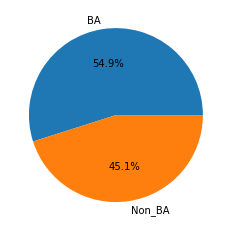

In [148]:
kor_df_id[["family_member","gender","education_level","religion"]] = kor_df_id[["family_member","gender","education_level","religion"]].apply(lambda x: round(x))
kor_df_id["edu_BA"] = kor_df_id["education_level"].apply(lambda x : 1 if x >= 6 else 0) 
BA = kor_df_id["edu_BA"].sum()
Non_BA = len(kor_df_id["edu_BA"]) - BA
ratio = [BA, Non_BA]
labels = ['BA', 'Non_BA']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()
# 전체 데이터에서 대학을 졸업한 사람이 55% 정도의 비율을 보입니다.
# 평균연령을 조절하지 않고, 전체 데이터로 조사해본 결과 대졸자는 34%의 비율을 보였습니다
# 이는 대졸자가 취업시장에서 유의미한 상관을 보였기 때문에 생긴 결과라 생각합니다.

<AxesSubplot:>

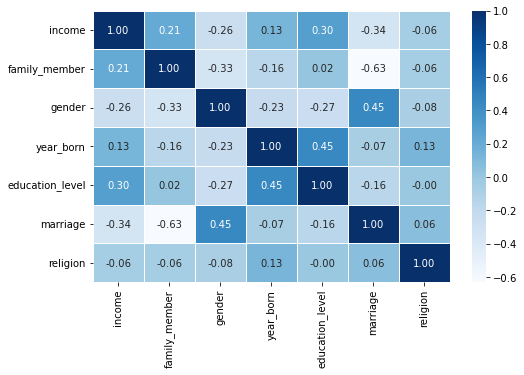

In [149]:
data = kor_df_id[["income","family_member","gender","year_born","education_level","marriage","religion"]]
data = (data-data.min())/(data.max()-data.min())
plt.figure(figsize=(8,5))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
# 소득과 가장 높은 상관관계를 가지는 것은 eductaion_level, 즉 교육정도입니다.

In [150]:
# job_code의 결측값을 0으로 채워준다
korea['job_code'] = korea['job_code'].fillna(0)
korea['getting job'] = korea['job_code'].map(lambda x: 1 if x != 0 else x)
korea['age'] = np.round(2021 - df['year_born'])

# Editing
# Family member
korea['family_member'] = korea['family_member'].map(lambda x: x
                                              if x in [1, 2, 3, 4] else '5+')

In [151]:
korea.region

0        1
1        1
2        1
3        1
4        1
        ..
92852    5
92853    5
92854    5
92855    5
92856    5
Name: region, Length: 92857, dtype: int64

In [152]:
# region
korea.loc[:, 'region'] = korea['region'].replace({
    1: 'Seoul',
    2: 'Kyeong-gi',
    3: 'Kyoung-nam',
    4: 'Kyoung-buk',
    5: 'Chung-nam',
    6: 'Gang-won/Chung-buk',
    7: 'Jeolla/Jeju'
})
# gender
korea.loc[:, 'gender'] = korea['gender'].replace({1: 'male', 2: 'female'})

# education_level
korea.loc[:, 'education_level'] = korea['education_level'].replace({
    1:
    'no education(<7)',
    2:
    'no education(>=7)',
    3:
    'elementary',
    4:
    'middle school',
    5:
    'high school',
    6:
    'college',
    7:
    'university degree',
    8:
    'MA',
    9:
    'doctoral degree'
})
# marriage
korea.loc[:, 'marriage'] = korea['marriage'].replace({
    1: 'not applicable(<18)',
    2: 'married',
    3: 'separated by death',
    4: 'separated',
    5: 'not married yet',
    6: 'others'
})

# religion
korea.loc[:, 'religion'] = korea['religion'].replace({
    1: 'have religion',
    2: 'do not have'
})

# korea.loc[:, 'reason_none_worker'] = korea['reason_none_worker'].replace({
#     '1':
#     'no capable',
#     '2':
#     'in military service',
#     '3':
#     'studying in school',
#     '4':
#     'prepare for school',
#     '5':
#     'prepare to apply job',
#     '6':
#     'house worker',
#     '7':
#     'caring kids at home',
#     '8':
#     'nursing',
#     '9':
#     'giving-up economic activities',
#     '10':
#     'no intention to work',
#     '11':
#     'others'
# })

korea['Main_category'] = korea['대분류'].replace({
    '1 관리자': 'Manager',
    '2 전문가 및 관련 종사자': 'Expert and related worker',
    '3 사무 종사자': 'Office worker',
    '4 서비스 종사자': 'Service worker',
    '5 판매 종사자': 'Sales worker',
    '6 농림어업 숙련 종사자': 'Skilled worker in agriculture, forestry and fisheries',
    '7 기능원 및 관련 기능 종사자': 'Craftsmen and related skilled workers',
    '8 장치ㆍ기계 조작 및 조립 종사자':
    'Equipment and machine operation and assembly workers',
    '9 단순노무 종사자': 'Simple labor worker',
    'A 군인': 'Soldier'
})

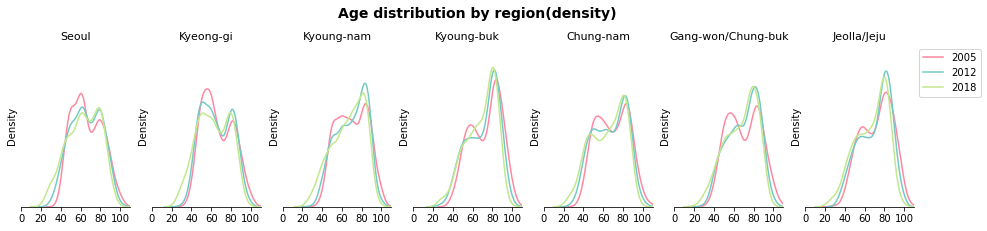

In [183]:
def plot_age(indf, region_order, ax, color):
    i = 0
    for idx in region_order:
        val = indf[indf['region'] == idx]['age']
        sns.distplot(val, hist=False, color=color, ax=axes[i], label= ' ')

        axes[i].set_xlabel(idx, fontsize=11, fontweight='light')
        axes[i].set_yticks([])
        
        axes[i].set_xlim(0, 110)
        axes[i].set_ylim(0, 0.035)
        axes[i].set_xticks([0, 20, 40, 60, 80, 100])
        axes[i].xaxis.set_label_position('top')
        
        for s in ['top', 'left', 'right']:
            axes[i].spines[s].set_visible(False)
        i += 1

colors = ['#fe88a0', '#74c9c6', '#c2e88d']
fig, axes = plt.subplots(1, 7, figsize=(16, 3))

i = 0
for d, c in zip(data, colors):
    plot_age(d, region_order, axes, c)
    i += 1
    
# Remove legend
for i in range(6):
    plt.setp(axes[i].legend(), visible=False)
    
fig.text(0.4,1, 'Age distribution by region(density)', fontsize = 14, fontweight = 'bold')
plt.legend(['2005', '2012', '2018'], bbox_to_anchor = (1, 1))
plt.show()
# 지역별 나이 분포
# 서울 지역은 5~60대가 가장 많고 경기지역은 4~50대가 가장 많고
# 경남, 경북, 충남, 강원/충북, 전라/제주 지역은 80~90대가 가장 많이 분포하고 있음을 확인할 수 있습니다. 
# 서울과 경기 지역을 제외하고 모든 지역이 80~90대가 많은 것을 보아 한국의 고령화 현상이 심해지고 있는 것을 알 수 있습니다.

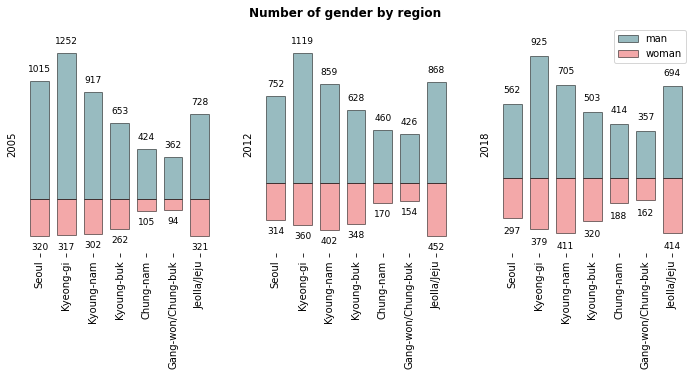

In [155]:
# 3-years data(2005, 2012, 2018)
region_order = ['Seoul', 'Kyeong-gi', 'Kyoung-nam', 'Kyoung-buk',
                'Chung-nam', 'Gang-won/Chung-buk', 'Jeolla/Jeju']
# 지역별 성별의 수
def plot_gender(in_df, region_order, ax):
    region_man = in_df[in_df['gender'] == 'male']['region'].value_counts()[
        region_order]
    region_woman = in_df[in_df['gender'] == 'female']['region'].value_counts()[
        region_order]

    ax.bar(region_man.index, region_man, width=0.7,
           edgecolor='black', color='#337882', alpha=0.5, label='man')
    ax.bar(region_woman.index, -region_woman, width=0.7,
           edgecolor='black', color='#e85255', alpha=0.5, label='woman')

    # Annotation
    for idx in region_man.index:
        # Man
        ax.annotate(f"{region_man[idx]}",
                    xy=(idx, region_man[idx] + 100),
                    va='center',
                    ha='center',
                    fontweight='light',
                    fontsize=9)
        # Woman
        ax.annotate(f"{region_woman[idx]}",
                    xy=(idx, -region_woman[idx] - 100),
                    va='center',
                    ha='center',
                    fontweight='light',
                    fontsize=9)

        ax.set_ylim(-max(region_woman) - 150, max(region_man) + 150)
        ax.set_yticks([])
        ax.set_xticklabels(region_man.index, rotation=90)

        # remove guide line
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

korea_2005 = korea[korea['year'] == 2005]
korea_2012 = korea[korea['year'] == 2012]
korea_2018 = korea[korea['year'] == 2018]

data = [korea_2005, korea_2012, korea_2018]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
i = 0
for d in data:
    plot_gender(d, region_order, axes[i])
    i += 1

axes[2].legend(bbox_to_anchor=(1, 1.05))
axes[0].set_ylabel('2005')
axes[1].set_ylabel('2012')
axes[2].set_ylabel('2018')

fig.suptitle('Number of gender by region', fontsize=12, fontweight='bold')
plt.show()
# 지역별로 성별을 시각화 해 본 결과, 전체적으로 남성의 비율이 훨씬 높습니다.
# 특히 2005년도에는 남여 비율의 차가 다른 연도보다 심하며, 시간이 흐를 수록 남여의 성비가 줄어들고 있음을 알 수 있습니다.
# 또한 가장 많은 인구가 있는 지역은 경기 지역이며, 남여의 성비가 가장 많이 차이나는 지역도 경기입니다
# 그리고 강원/충북 지역의 인구가 가장 적은 것으로 확인됩니다.

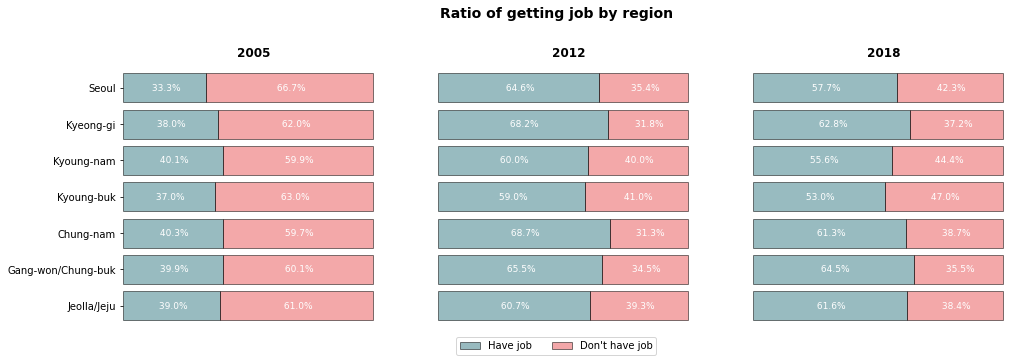

In [156]:
# 지역별 무직자의 수
def plot_getting_job(indf, region_order, ax):

    region_job = indf.groupby(['region', 'getting job'])[
        'getting job'].count().unstack().reindex(region_order)[::-1]
    region_ratio = (region_job.T / region_job.sum(axis=1)).T

    ax.barh(region_ratio.index,
            region_ratio[1], label='Have job', edgecolor='black', color='#337882', alpha=0.5)
    ax.barh(region_ratio.index, region_ratio[0], left=region_ratio[1],
            label='Don\'t have job', edgecolor='black', color='#e85255', alpha=0.5)

    for ro in region_order[::-1]:
        ax.annotate(f"{region_ratio[1][ro] * 100 : .1f}%",
                    xy=(region_ratio[1][ro]/2, ro),
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white')
        ax.annotate(f"{region_ratio[0][ro] * 100 : .1f}%",
                    xy=(region_ratio[1][ro] + region_ratio[0][ro]/2, ro),
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white')

        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        ax.set_xticks([])
        ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_getting_job(d, region_order, axes[i])
    i += 1

axes[1].legend(loc='lower center', bbox_to_anchor=(0.45, -0.1), ncol=5)
axes[0].set_xlabel('2005', fontsize=12, fontweight='bold')
axes[1].set_xlabel('2012', fontsize=12, fontweight='bold')
axes[2].set_xlabel('2018', fontsize=12, fontweight='bold')

axes[1].set_yticks([])
axes[2].set_yticks([])

fig.text(0.40, 1, 'Ratio of getting job by region',
         fontsize=14, fontweight='bold')
plt.show()
# 2005년도에는 지역의 전체가 무직자의 비율이 높고 의외로 서울지역의 무직자가 많은 것을 보입니다.
# 2012년이후부터는 직업을 가지고 있는 사람의 비율이 높아졌습니다.

In [173]:
korea[korea['Main_category'].notnull()]['Main_category'].value_counts()

Skilled worker in agriculture, forestry and fisheries    10079
Office worker                                             1642
Sales worker                                              1427
Simple labor worker                                       1080
Service worker                                             423
Craftsmen and related skilled workers                      110
Equipment and machine operation and assembly workers        99
Expert and related worker                                   75
Manager                                                     42
Soldier                                                     39
Name: Main_category, dtype: int64

In [170]:
korea[korea['대분류'].notnull()]['대분류']

10           4 서비스 종사자
142           3 사무 종사자
184          4 서비스 종사자
201           3 사무 종사자
202           3 사무 종사자
             ...      
92823    6 농림어업 숙련 종사자
92824    6 농림어업 숙련 종사자
92834    6 농림어업 숙련 종사자
92842    6 농림어업 숙련 종사자
92844    6 농림어업 숙련 종사자
Name: 대분류, Length: 15016, dtype: object

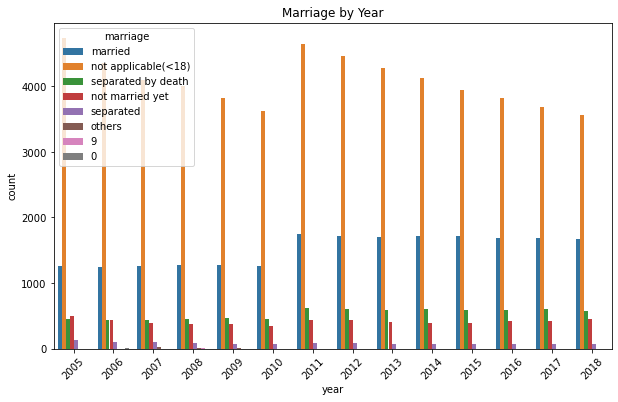

In [176]:
# 연도별 결혼 현황
plt.figure(figsize = (10,6))
sns.countplot(data = korea, x='year', hue='marriage')
plt.title('Marriage by Year')
plt.xticks(rotation=45)
plt.show()
# 연도별로 결혼한 사람의 수를 시각화 해보았을 때, 
# 2005년부터 2010년까지 일정한 비율을 유지하는 형태를 보이다가 2011년 이후 증가하였습니다. 
# 뉴스를 찾아보니 2011년은 전년과 비교해 결혼은 증가하고 이혼은 감소한 것으로 조사되었습니다.
# 통계청이 발표한 '2011년 혼인∙이혼통계'에 따르면 지난해 전체 혼인건수는 2010년과 비교해 0.9% 증가한 반면, 
# 이혼건수는 2.2% 감소한 것으로 나타났습니다.
# 또한 2003년 카드대란 이후 이혼율은 정점을 찍고 감소했다는 사실을 알 수 있었습니다.
# 그리고 통계청에 따르면 이혼율 감소에는 2008년부터 시행된 이혼숙려제의 도입도 긍정적인 영향을 미친 것으로 평가했습니다.

In [184]:
# https://www.koweps.re.kr:442/main.do;jsessionid=4DFEB6714B5A12A966A9C81D3728BA2F
# 한국복지패널
# https://www.kaggle.com/code/cmule90/simple-eda-korea-income-and-welfare